## Get monthly surface area for 10 reservoirs

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os

import warnings
warnings.filterwarnings('ignore')

## Match surface areas to depth gauge data
The reference table 'Depth_to_Surface_all_gauges.csv' has 0 values in it which need to be fixed
1. load depth to surface tables
2. load depth gauge data
3. Add surface area to depth gauge data

In [143]:
#read in reference table of depth to surface area
dsa = pd.read_csv('Depth_to_Surface_all_gauges.csv')
dsa = dsa[['Gauge_Name', 'Gauge_ID', 'Depth', 'Surface_Area', 'State']]


name1 = 'Library/maroondah_229130A.csv'
name1 = name1[8:~3]

csv = 'Library/' + name1 + '.csv'

#Get gauge ID
gauge_number_df = pd.read_csv(csv, nrows=1, escapechar='#')
column2 = list(gauge_number_df)[1]
gauge_number_df = gauge_number_df.rename(columns = {column2 : 'gauge_ID'})
ID = gauge_number_df.at[0, 'gauge_ID']
ID = str(ID)
gauge_name_df = pd.read_csv(csv, nrows=2, escapechar='#')
name = list(gauge_name_df)[1]

# read in gauge data. I've taken out error_bad_lines = False from the read_csv function, as it got a depreciation warning 
df = pd.read_csv(csv, 
                    skiprows=9, escapechar='#',
                         parse_dates=['Timestamp'], 
                         index_col=('Timestamp'),
                        date_parser=lambda x: pd.to_datetime(x.rsplit('+', 1)[0]))

# organise into monthly average
df = df.resample('MS').mean() #Use this pandas function MS (monthly summary) to get the mean value of each month 
df = df.dropna()
df = df.astype(np.int64)
df['Gauge_ID'] = ID
df = df[['Value', 'Gauge_ID']]
df['Value'] = df['Value'].round(0)
df['Surface_Area'] = '0'
df['Timestamp'] = df.index
df = df.set_index(df['Value'])

# Get the right depth to surface area reference
dsa_df = dsa.loc[dsa['Gauge_ID'] == ID]
dsa_df = dsa_df.set_index(dsa_df['Depth'])

# use the reference table to index match surface area to depth
# I found this method on the internet
s = dsa_df.Surface_Area.reindex(df.Value).values 
df['Surface_Area'] = np.where(np.isnan(s), df['Surface_Area'],s)
### END LOOP ###

df

,Value,Gauge_ID,Surface_Area,Timestamp
Value,,,,
125,125,229130A,0,1926-08-01
129,129,229130A,1118125.0,1926-09-01
131,131,229130A,1246250.0,1926-10-01
132,132,229130A,1311250.0,1926-11-01
132,132,229130A,1311250.0,1926-12-01
...,...,...,...,...
138,138,229130A,1647500.0,2020-12-01
137,137,229130A,1605000.0,2021-01-01
137,137,229130A,1605000.0,2021-02-01


<AxesSubplot:xlabel='Timestamp'>

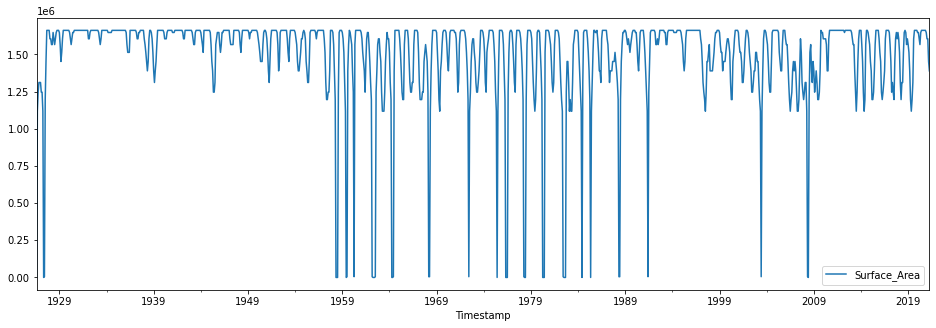

In [144]:
df_plot = df.set_index(df['Timestamp'])
df_plot = df_plot.drop(columns = ['Value', 'Gauge_ID', 'Timestamp'])
df_plot['Surface_Area'] = df_plot['Surface_Area'].astype(int)
df_plot.plot(figsize=(16, 5))
                       

In [145]:
dsa_df

,Gauge_Name,Gauge_ID,Depth,Surface_Area,State
Depth,,,,,
128,WATTS RIV-MAROONDAH,229130A,128,5000.0,VIC
129,WATTS RIV-MAROONDAH,229130A,129,1118125.0,VIC
130,WATTS RIV-MAROONDAH,229130A,130,1196250.0,VIC
131,WATTS RIV-MAROONDAH,229130A,131,1246250.0,VIC
132,WATTS RIV-MAROONDAH,229130A,132,1311250.0,VIC
133,WATTS RIV-MAROONDAH,229130A,133,1389375.0,VIC
134,WATTS RIV-MAROONDAH,229130A,134,1452500.0,VIC
135,WATTS RIV-MAROONDAH,229130A,135,1513750.0,VIC
136,WATTS RIV-MAROONDAH,229130A,136,1566250.0,VIC


## Manually fix any 0 values

In [146]:
print(df.Value.min())
print(df.Value.max())

125
139


In [130]:
#n_ls = [483, 484, 485, 486]
#for i in n_ls:
#    df.loc[i, 'Surface_Area'] = 1598750.0
df.loc[12, 'Surface_Area'] = 1684375.0
#df.loc[453, 'Surface_Area'] = 921875.0
#df.loc[452, 'Surface_Area'] = 821875.0
#df.loc[832, 'Surface_Area'] = 35838750.0
#df.loc[831, 'Surface_Area'] = 35838750.0

#df.loc[208, 'Surface_Area'] = 2173125.0
#df.loc[207, 'Surface_Area'] = 2073125.0
#df.loc[206, 'Surface_Area'] = 1973125.0

In [142]:
#save out as csv file
df.to_csv('Monthly_Surface_Areas/' + name1 + '_Depth_to_Surface_Area.csv')

## ID Checker

In [ ]:
df = pd.read_csv('names_and_IDs.csv',
                index_col = 'gauge_ID')
df.loc['419041']